Title: Intro to Hypothesis Testing and z-tests 
Slug: z-tests
Summary: Learn how to setup hypothesis tests and validate if a single sample parameter is significantly different than the population parameter and the hypothetical true parameter for z-tests
Date: 2018-1-8 11:42  
Category: Math
Subcategory: Inferential Statistics
PostType: Tutorial
Keywords: z-tests python
Tags: p-values, sampling distribution, standard error, z-score, statistics, standard deviation, normal distribution, python
Authors: Dan Friedman

In the field of inferential statistics, we make **hypotheses** - proposed explanations typically made on the basis of limited evidence that's used as a starting point for further investigation. Statistical hypothesis testing helps determine the probability that a given hypothesis is true using a dataset.

A **z-test** is validating if a sample parameter (such as the mean) is *significantly* different than a population parameter when the sample mean has a treatment effect. I'll explain how hypothesis testing works through many examples of z-tests below.

I'll explain why the word *significantly* is in italics later on too. 

Before reading this post, I'd recommend familiarity with the following terms: z-scores, normal distribution, standard deviation, standard error and the central limit theorem.

#### Import Modules

In [21]:
import seaborn as sns
import scipy.stats as stats
import numpy as np
import random
import warnings
import matplotlib.pyplot as plt
% matplotlib inline

#### Visualization styling code

In [22]:
sns.set(rc={'figure.figsize':(13, 7.5)})
sns.set_context('talk')

#### Turn Off Warnings

I turn warnings off in this post because of an <a href='https://stackoverflow.com/a/52817582'>issue in Scipy</a> that will be fixed in a later version.

In [23]:
warnings.filterwarnings('ignore')

### Hypothesis Tests Order of Steps

Below are the steps used for performing a hypothesis test to compare a single sample group with treatment to a population and determine the statistical significance. This article will mainly detail steps 2 - 4 and 6 - 8. 

1) Take measurements from a large control group we'll call the population.

2) Declare a null and alternative hypothesis.
    - This information provides background for a one-tail or two-tail test.

3) Decide on an alpa level - the probability of obtaining a sample mean with treatment from the population.

4) Apply a treatment to a new sample group of size $n$ and record measurements.
    - We want to compare this treatment group to our population to see if this treatment had an effect.

5) Take a sufficient number of samples of size $n$ from the population values and record a single statistic of each sample such as the mean or median. This is called the **sampling distribution**.
    - A distribution of these sample means (or medians) would be a normal distribution based on the Central Limit Theorem.
    
6) Calculate the standard deviation of the sampling distribution - called the **standard error**.
    
7) Compute how many standard errors the statistic (such as the mean) of the sample group with treatment is from the statistic (such as the mean) of the sampling distribution. This is called the z-score.

8) Determine if this sample group with treatment is *significantly* different from the population based on the pre-decided alpha level.

### One-Tail Hypothesis Tests

#### Visualization of One-Tail

Below, this normal distribution has an area under the curve of $1$. This visualization shades just the right-tail of the distribution that has an area under the curve of just $0.05$ equivalent to $5\%$.

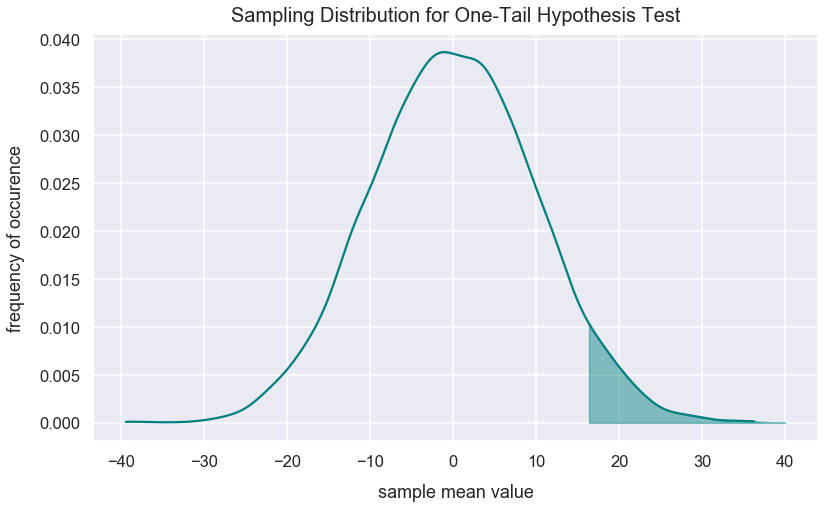

In [24]:
values = np.random.normal(loc=0, scale=10, size=6000)
two_std_from_mean = np.mean(values) + np.std(values)*1.645
kde = stats.gaussian_kde(values)
pos = np.linspace(np.min(values), np.max(values), 10000)
plt.plot(pos, kde(pos), color='teal')
shade = np.linspace(two_std_from_mean, 40, 300)
plt.fill_between(shade, kde(shade), alpha=0.45, color='teal')
plt.title("Sampling Distribution for One-Tail Hypothesis Test", y=1.015, fontsize=20)
plt.xlabel("sample mean value", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14);

For a one-tail test, the **critical region** (an example is the one shaded above) can be on the left or right side of the distribution. The critical region defines statistically *unlikely* values.

#### Levels of Likelihood for One-Tail Test

Below represent values for the probability of getting a sample mean from a sampling distribution along with the equivalent percentage likelihood and z-score. 

The probability values are called **$\alpha$ levels** and all are *unlikely* occurences. I call it *unlikely* because this sample mean likely didn't occur by random chance. There may have been an effect on that sample mean.

probability of obtaining sample mean ($\alpha$ level) | equivalent percentage likelihood | z-score cutoff for one tail
-- | --- | ---
$0.05$ | $5\%$ | $\pm1.645$
$0.01$ | $1\%$ | $\pm2.33$
$0.001$ | $0.1\%$ | $\pm3.1$

Under a normal distribution, a z-score of roughly $1.645$ has an area under the curve to the left of the z-value of $0.95$ ($95\%$ probability). Any z-score of $1.65$ or greater means you're *unlikely* to sample such a sample from the sampling distribution given an alpha of $0.05$. The region to the right of that z-value is called the **critical region**. In this instance, the z-score is called the **z-critical value**.

The `cdf()` method from the scipy package and accompanying <a href='https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html'>stats module</a> returns the proportion of values smaller than the observation inputted for a normal distribution. Let's see the area under the curve to the left of the z-score for the z-scores listed in the table above.

In [25]:
round(stats.norm.cdf(1.645), 3)

0.95

In [26]:
round(stats.norm.cdf(2.33), 3)

0.99

In [27]:
round(stats.norm.cdf(3.1), 3)

0.999

For any sample mean, we can interpret if it's statistically *significant* - essentially telling us how *likely* or *unlikely* this sample mean is within the sampling distribution. The table below only shows examples for a one-tailed hypothesis test.

If the probability of getting a particular sample mean is less than $\alpha$, it is *unlikely* to occur. 

Note below, $p$ is equivalent to probability and $\bar{x}$ is the sample mean.

The table below shows interpretations of popular significance levels. Square brackets such as $[$ signify inclusivity of the value next to it while parentheses such as $($ signify exclusivity of the value next to it.  

z-score range for positive one-sided test | z-score range for negative one-sided test | statistical interpretation | layman's interpretation
---| --- | --- | ---
[1.645, 2.33) | [-1.645, -2.33) | $\bar{x}$ is significant at p<0.05 | probability of sampling $\bar{x}$ from the sampling distribution is less than 0.05
[2.33, 3.1) | [-2.33, -3.1) | $\bar{x}$ is significant at p<0.01 | probability of sampling $\bar{x}$ from the sampling distribution is less than 0.01
[3.1, $\infty$) | [-3.1, $-\infty$) | $\bar{x}$ is significant at p<0.001 | probability of sampling $\bar{x}$ from the sampling distribution is less than 0.001

When constructing a hypothesis test, it is best to choose a significant level such as the ones above *before* you perform a test. You can later report the results as significant at a certain critical level after obtaining the result.

If you simply analyze the results for all statistical significance levels, you may be "fishing" for results that don't meet the original purpose of your hypothesis test.

### Two-Tailed Hypothesis Tests

This visualization shades two equal areas on each tail of the normal distribution of sample means.

Each tail of the distribution has a shaded area of $0.025$.

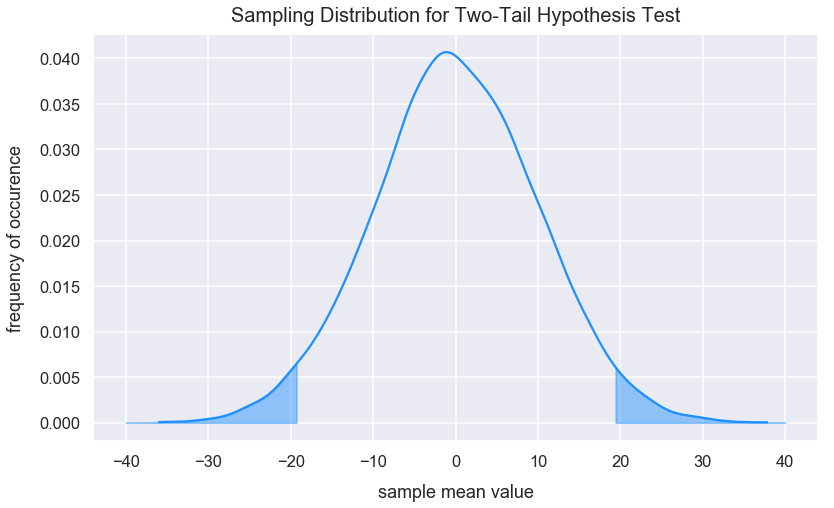

In [28]:
values = np.random.normal(loc=0, scale=10, size=6000)
alpha_05_positive = np.mean(values) + np.std(values)*1.96
alpha_05_negative = np.mean(values) - np.std(values)*1.96
kde = stats.gaussian_kde(values)
pos = np.linspace(np.min(values), np.max(values), 10000)
plt.plot(pos, kde(pos), color='dodgerblue')
shade = np.linspace(alpha_05_positive, 40, 300)
plt.fill_between(shade, kde(shade), alpha=0.45, color='dodgerblue')
shade2 = np.linspace(alpha_05_negative, -40, 300)
plt.fill_between(shade2, kde(shade2), alpha=0.45, color='dodgerblue')
plt.title("Sampling Distribution for Two-Tail Hypothesis Test", y=1.015, fontsize=20)
plt.xlabel("sample mean value", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14);

Below represent values for the probability of getting a sample mean from a sampling distribution along with the equivalent percentage likelihood and z-score. 

probability of obtaining sample mean ($\alpha$ level) | probability on each tail | z-score cutoff for each tail
-- | --- | ---
0.05 | 0.025 | $\pm1.96$
0.01 | 0.005 | $\pm2.575$
0.001 | 0.0005 | $\pm3.29$

Let's see the area under the curve to the left of the z-score for the z-scores listed in the table above.

In [29]:
round(1-stats.norm.cdf(1.96), 3)

0.025

In [30]:
round(1-stats.norm.cdf(2.575), 3)

0.005

In [31]:
round(1-stats.norm.cdf(3.29), 3)

0.001

The table below shows interpretations of popular significance levels. Square brackets such as $[$ signify inclusivity of the value next to it while parentheses such as $($ signify exclusivity of the value next to it.  

z-score range for two-tailed test | interpretation
-- | --- 
[1.96, 2.575) or [-1.96, -2.575) | $\bar{x}$ is significant at p<0.05
[2.575, 3.29) or [-2.575, -3.29) | $\bar{x}$ is significant at p<0.01
[3.29, $\infty$) or [-3.29, $-\infty$) | $\bar{x}$ is significant at p<0.001

### Hypotheses

Earlier I mentioned **hypotheses** as proposed explanations typically made on the basis of limited evidence that's used as a starting point for further investigation. 

The null hypothesis commonly denoted as $H_{o}$ assumes no significant difference between current population parameters and what will be the new population parameters after some intervention (otherwise called a treatment). This is expressed in math notation for comparisons of means as $\mu = \mu_{i}$ (with the $i$ representing an intervention). However the two sides don't have to be *exactly* equal. Rather, they shouldn't be *significantly* different from one another. 

The alternative hypothesis commonly denoted as $H_{a}$ guesses there *will* be a *significant* difference between the current population parameters and the new population parameters after some intervention. 

The three possible scenarios for one and two-tailed tests with explanations for each are as follows:

alternative hypothesis | interpretation | number of tails | critical region of tail(s) of distribution to reject the null
--- | --- | --- | --- 
$\mu<\mu_{i}$ | current population parameter will be less than the new population parameter after an intervention | one | positive
$\mu>\mu_{i}$ | current population parameter will be greater than the new population parameter after an intervention | one | negative
$\mu\neq\mu_{i}$ | no prediction on a direction for the treatment | two | positive or negative

Side note: the two-tailed test is most conservative because the probability on each tail is smaller than a tail on a one-sided test.

#### Interpretation of Hypotheses

Here's what it means to reject the null hypothesis:

- The sample mean falls within the critical region.
- The z-score of the sample mean is greater than the z-critical value.
- The probability of obtaining the sample mean is less than the alpha level.

We can't prove the null hypothesis is true. We can only obtain evidence to *reject* the null hypothesis. 

### Example Hypotheses

#### Hypothesis Example #1: Tree Branches

$H_{o}$: Most trees have more than 20 branches (most = more than 50%).

$H_{a}$: Most trees have less than 20 branches.

The 50% represents the criteria for our alpha level. This is an example of a one-sided test.

$\mu_{i}$ represents the mean number of branches for trees that each have less than 20 branches.

$H_{o}$: $\mu <= \mu_{i}$

$H_{a}$: $\mu > \mu_{i}$

Let's say we sample 10 trees and find that all have *more* than 20 branches. 

This sample is evidence that most (greater than 50%) trees have more than 20 branches. We will *fail to reject* the null hypothesis.

#### Hypothesis Example #2: Personal Trainer at Gym Effect on Mass

Null hypothesis: having Joe as a personal trainer for three weightlifting workouts per week over the course of a year has no effect on one's mass.

Alternative hypothesis: having Joe as a personal trainer for three weightlifting workouts per week over the course of a year has a *significant* effect on the client's mass.

$H_{o}$: $\mu = \mu_{joe}$

$H_{a}$: $\mu \neq \mu_{joe}$

To reject the null hypothesis, the sample mean with treatment could be on either end of the sampling distribution. This is considered a two-tailed test.

To gather data for the sampling distribution, assume I visited the gym 24/7 for a month and collected data on $5,500$ people's mass who claimed to exercise on average three times per week over the last year but didn't have joe as a personal trainer.

To gather data for the treatment group, assume I visited the gym one day and sampled 30 people on their mass who weightlifted at the gym on average three times per week over the past year with Joe's personal training guidance.

Let's set an alpha level for this experiment of $0.05$.

Below, I create the fictional population data.

In [32]:
population_mean_pounds = 160
population_size = 5500
population_std_dev_pounds = 22

np.random.seed(50)
population_gym_goers_mass = np.random.normal(loc=population_mean_pounds, scale=population_std_dev_pounds, size=5500)

Below, I create the fictional sample data.

In [33]:
n = 30
treatment_sample_mean_pounds = 169

Create the sampling distribution from the population in order to be able to compare with `treatment_sample_mean_pounds`.  I take $330$ of each $30$ random values with replacement from the population.

In [34]:
np.random.seed(50)
sample_means = []
for sample in range(0, 330):
    sample_values = np.random.choice(a=population_gym_goers_mass, size=n)    
    sample_mean = np.mean(sample_values)
    sample_means.append(sample_mean)

Let's visualize the sampling distribution.

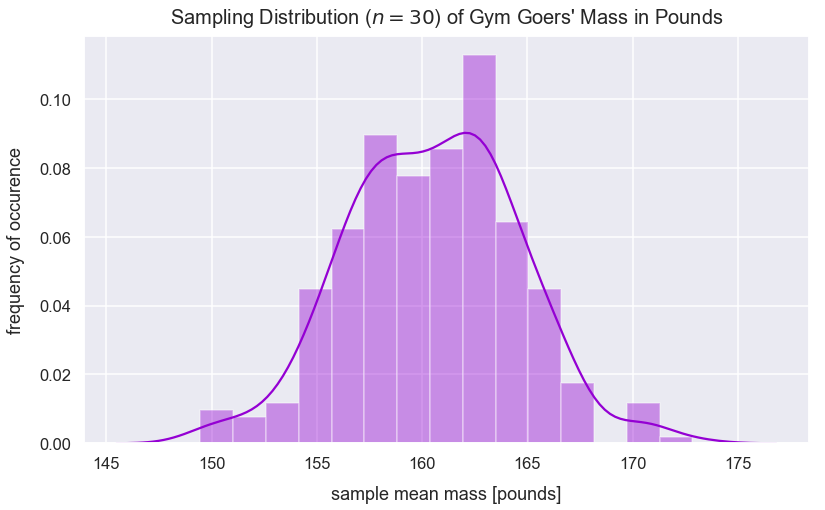

In [35]:
sns.distplot(sample_means, color='darkviolet')
plt.title("Sampling Distribution ($n=30$) of Gym Goers' Mass in Pounds", y=1.015, fontsize=20)
plt.xlabel("sample mean mass [pounds]", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14);

Let's compute the standard error which is the standard deviation of the sampling distribution. The equation is below:

$$SE=\frac{\sigma }{\sqrt{n}}$$

- $\sigma$ is population standard deviation
- $n$ is sample size

In [36]:
standard_error_pounds = population_std_dev_pounds / np.sqrt(n)
standard_error_pounds

4.016632088371218

Let's calculate how many standard errors `treatment_sample_mean_pounds` is from `population_mean_pounds` and express this as a z-score.

I can use the following z-score equation:

$$z=\frac{\bar{x}-\mu}{SE}$$

- $\bar{x}$ is the sample mean
- $\mu$ is the population mean
- $SE$ is the standard error calculated as $\frac{\sigma }{\sqrt{n}}$

In [37]:
z_score = (treatment_sample_mean_pounds - population_mean_pounds)/standard_error_pounds
z_score

2.2406831897938613

Let's visualize where `treatment_sample_mean_pounds` lies on the distribution of sample mean masses of groups collected at the gym that didn't have the treatment of Joe's personal training.

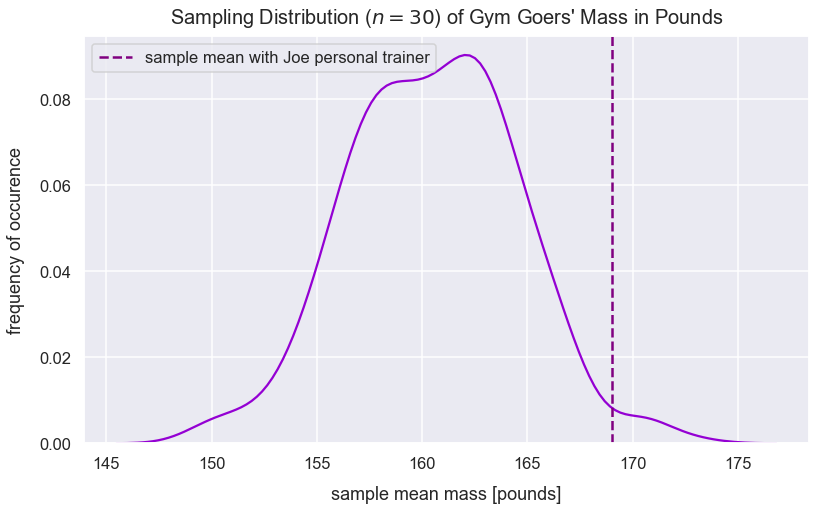

In [38]:
sns.distplot(sample_means, color='darkviolet', hist=False)
plt.axvline(x=treatment_sample_mean_pounds, linestyle='--', linewidth=2.5, label="sample mean with Joe personal trainer", c='purple')
plt.title("Sampling Distribution ($n=30$) of Gym Goers' Mass in Pounds", y=1.015, fontsize=20)
plt.xlabel("sample mean mass [pounds]", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14)
plt.legend();

Our initial alpha level was $0.05$. The equivalent z-score cutoff for each tail is $\pm1.96$. Above, we calculated a z-score value of $2.24$ which is greater than $1.96$. 

`treatment_sample_mean_pounds` is *significant* at $p<0.05$ so we have obtained sufficient evidence to reject the null hypothesis. There's evidence of an effect of mass gain through 3x per week personal training sessions with Joe over the course of a year.

### Hypothesis Testing Caveats

This type of statistical analysis is prone to misinterpretation. It's possible that those sampled and treated by Joe's personal training already had a history of major weight gain through lifting or had not hit a plateua yet with their potential to gain weight. So, they could have been ideal candidates for Joe to push them to gain muscle rapidly. If either of those scenarios are the case, it's possible that the new estimated population parameters with the treatment are slightly biased. 

Given this misinterpretion or another issue, our hypothesis testing may result in an error. 

### Decision Errors

In the figure below, each quadrant has a meaning about correct or incorrect decisions in hypothesis testing.

Typically, in hypothesis testing, the "truth about the population" is unknown at first. For the example of Joe's personal training, the true population mean of people's weight would be if we could apply the treatment to a sufficiently large number of samples (perhaps hundreds of people) and calculate the mean of sample means with this treatment.

I provide explanations of each quadrant (<a href='http://www.personal.ceu.hu/students/08/Olga_Etchevskaia/hypotheses.html'>image source</a>) below. 

![hypothesis testing decision errors](images/errors.jpg)

The top left quadrant means the ground truth is that the null hypothesis is true, yet our research concluded to *reject* the null hypothesis (*significant* effect from the treatment). We made an incorrect statistical decision. This is considered a Type 1 error.

The top right quadrant means the ground truth is that the alternative hypothesis is true and our research concluded to reject the null hypothesis (*significant* effect from the treatment). This is an ideal situation.

The bottom left quadrant means the ground truth is that the null hypothesis is *true* and our research concluded that there's *no* evidence to reject the null hypothesis. This is an ideal situation.

The bottom right quadrant means the ground truth is that the alternative hypothesis is true, yet our research concluded that there's *no* evidence to reject the null hypothesis. We made an incorrect statistical decision. This is considered a Type 2 error. 

#### How to Reduce Decision Errors

We minimize our chances of making the wrong decision when we have a large enough sample size, we randomize our sample and when we implmement proper experimental controls.

#### Example: Statistical Decision Errors in Rain Scenario

$H_{o}$: It's not going to rain later today (so I don't need an umbrella).

$H_{a}$: It's going to rain later today (so I should bring an umbrella).

Four possible scenarios:

- I think it's going to rain later so I bring an umbrella. However, later it doesn't rain. This is a Type 1 error. 
- I think it's going to rain later so I bring an umbrella. I'm correct - it rained later and I was right in bringing an umbrella. (This is equivalent to the top right quadrant.)
- I think it's not going to rain later so I *don't* bring an umbrella. I'm correct - it *doesn't* rain later so I was correct in *not* bringing an umbrella. (This is equivalent to the bottom left quadrant.)
- I think it's not going to rain later so I *don't* bring an umbrella. However, later it rains. This is a Type 2 error.

### Continue Gym Personal Trainer Example with Hypothesis Test (of Known True Population Mean)

Earlier, I concluded `treatment_sample_mean_pounds` was *significant* at $p<0.05$ because I obtained sufficient evidence to reject the null hypothesis. There was evidence of an effect of mass gain through 3x per week personal training sessions with Joe over the course of a year.

Additionally, let's *assume* we found the true population mean of people's mass sampled at the gym for *everyone* after one year of 3x per week personal training sessions with Joe was $162$ pounds. In real life, we wouldn't know this value of $162$ because the treatment hasn't taken effect on the population in a study. However, in this example, let's *pretend* we do.

Let's assign the variable `true_population_mean_pounds_with_joe_training` to 162.

In [41]:
true_population_mean_pounds_with_joe_training = 162

In the equation for the z-score, we can utilize this new value to see how many standard errors `treatment_sample_mean_pounds` lies from `true_population_mean_pounds_with_joe_training`.

In [42]:
z_true = (treatment_sample_mean_pounds - true_population_mean_pounds_with_joe_training)/standard_error_pounds
z_true

1.7427535920618922

Our initial alpha level was $0.05$. The equivalent z-score cutoff for each tail is $\pm1.96$.

The `z_true` value is less than the z-critical value of $1.96$; the ground truth about the population $H_{o}$ is true. Having Joe as a persoanl trainer for three weightlifting workouts per week over the course of the year has *no* effect on one's mass. However, our earlier decision based on the sample with treatment was to reject the null hypothesis. In this instance, we committed a Type 1 error!

### Effect of Parameters on Treatment Effect

For hypothesis testing, we typically use the following two equations to calculate the standard error (SE) and a z-score for a sample mean:

$$SE=\frac{\sigma }{\sqrt{n}}$$

- $\sigma$ is population standard deviation
- $n$ is sample size

$$z=\frac{\bar{x}-\mu}{SE}$$

- $\bar{x}$ is the sample mean
- $\mu$ is the population mean
- $SE$ is the standard error calculated as $\frac{\sigma }{\sqrt{n}}$

An effect that exists is *more likely* to be detected with a change in the following variables utilized in the equations above:

- $n$ is larger (results in smaller SE and z-score farther from 0)
- $\sigma$ is smaller (results in smaller SE and z-score farther from 0)
- $\mu$ farther from $\bar{x}$ (results in z-score farther from 0)